In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | vestmanna
Processing Record 4 of Set 1 | agadez
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | stornoway
Processing Record 15 of Set 1 | pyaozerskiy
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | baisha
Processing Record 18 of Set 1 | galway
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of Set 1 | jackson
Processin

Processing Record 40 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | sao felix do xingu
Processing Record 43 of Set 4 | cape town
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | kaohsiung
Processing Record 46 of Set 4 | havre-saint-pierre
Processing Record 47 of Set 4 | opuwo
Processing Record 48 of Set 4 | rancho palos verdes
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | asekeyevo
Processing Record 1 of Set 5 | high level
Processing Record 2 of Set 5 | urumqi
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | eydhafushi
Processing Record 7 of Set 5 | praia
Processing Record 8 of Set 5 | tarudant
City not found. Skipping...
Processing Record 9 of Set 5 | masterton
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of

Processing Record 29 of Set 8 | tombouctou
Processing Record 30 of Set 8 | camopi
Processing Record 31 of Set 8 | severnyy
Processing Record 32 of Set 8 | nampa
Processing Record 33 of Set 8 | palana
Processing Record 34 of Set 8 | pingshan
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | thompson
Processing Record 37 of Set 8 | rafaela
Processing Record 38 of Set 8 | clearwater
Processing Record 39 of Set 8 | depalpur
Processing Record 40 of Set 8 | jacksonville
Processing Record 41 of Set 8 | tagusao
Processing Record 42 of Set 8 | kieta
Processing Record 43 of Set 8 | quelimane
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | traralgon
Processing Record 47 of Set 8 | luderitz
Processing Record 48 of Set 8 | nguiu
City not found. Skipping...
Processing Record 49 of Set 8 | sosnovka
Processing Record 50 of Set 8 | tautira
Processing Record 1 of Set 9 | ostersund
Processing

Processing Record 17 of Set 12 | ye
City not found. Skipping...
Processing Record 18 of Set 12 | telford
Processing Record 19 of Set 12 | boulder
Processing Record 20 of Set 12 | kashi
Processing Record 21 of Set 12 | yining
Processing Record 22 of Set 12 | barra do bugres
Processing Record 23 of Set 12 | velyka lepetykha
Processing Record 24 of Set 12 | xuddur
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | kearney
Processing Record 27 of Set 12 | batagay-alyta
Processing Record 28 of Set 12 | gat
Processing Record 29 of Set 12 | barddhaman
Processing Record 30 of Set 12 | xining
Processing Record 31 of Set 12 | honningsvag
Processing Record 32 of Set 12 | santiago del estero
Processing Record 33 of Set 12 | novikovo
Processing Record 34 of Set 12 | ciudad valles
Processing Record 35 of Set 12 | karla
Processing Record 36 of Set 12 | san quintin
Processing Record 37 of Set 12 | santa cruz de la palma
Processing Record 38 of Set 12 | bongandanga
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,57.99,62,75,8.05,AU,2021-05-12 04:54:34
1,Arlit,18.7369,7.3853,85.06,10,0,5.41,NE,2021-05-12 04:54:35
2,Vestmanna,62.1564,-7.1664,37.40,75,75,8.05,FO,2021-05-12 04:54:35
3,Agadez,19.7500,10.2500,83.97,10,0,6.73,NE,2021-05-12 04:54:35
4,Lompoc,34.6391,-120.4579,54.00,94,9,4.61,US,2021-05-12 04:54:36
5,Barrow,71.2906,-156.7887,17.60,79,90,9.22,US,2021-05-12 04:54:36
6,Lebu,-37.6167,-73.6500,49.82,79,41,10.16,CL,2021-05-12 04:54:36
7,Lorengau,-2.0226,147.2712,76.68,93,100,5.61,PG,2021-05-12 04:54:37
8,Rikitea,-23.1203,-134.9692,77.81,78,29,22.84,PF,2021-05-12 04:54:37
9,Saint-Philippe,-21.3585,55.7679,80.60,57,0,2.30,RE,2021-05-12 04:54:38


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-05-12 04:54:34,-42.8794,147.3294,57.99,62,75,8.05
1,Arlit,NE,2021-05-12 04:54:35,18.7369,7.3853,85.06,10,0,5.41
2,Vestmanna,FO,2021-05-12 04:54:35,62.1564,-7.1664,37.40,75,75,8.05
3,Agadez,NE,2021-05-12 04:54:35,19.7500,10.2500,83.97,10,0,6.73
4,Lompoc,US,2021-05-12 04:54:36,34.6391,-120.4579,54.00,94,9,4.61
5,Barrow,US,2021-05-12 04:54:36,71.2906,-156.7887,17.60,79,90,9.22
6,Lebu,CL,2021-05-12 04:54:36,-37.6167,-73.6500,49.82,79,41,10.16
7,Lorengau,PG,2021-05-12 04:54:37,-2.0226,147.2712,76.68,93,100,5.61
8,Rikitea,PF,2021-05-12 04:54:37,-23.1203,-134.9692,77.81,78,29,22.84
9,Saint-Philippe,RE,2021-05-12 04:54:38,-21.3585,55.7679,80.60,57,0,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

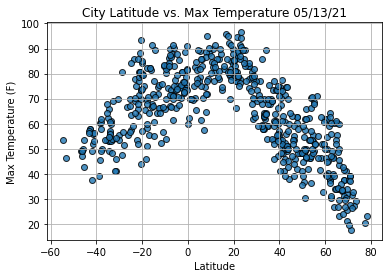

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

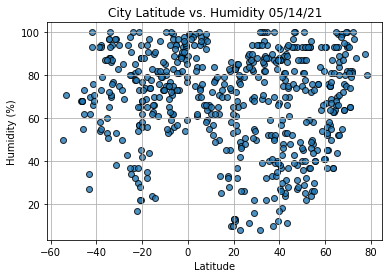

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

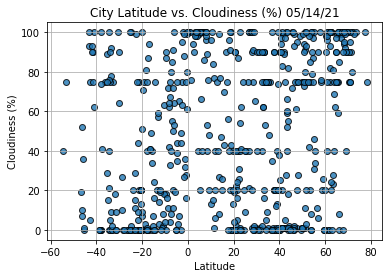

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

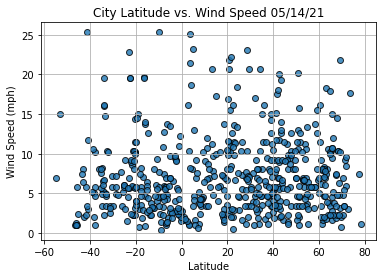

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Stornoway
Country                        GB
Date          2021-05-12 04:54:39
Lat                       58.2093
Lng                       -6.3865
Max Temp                     46.4
Humidity                       93
Cloudiness                     75
Wind Speed                   13.8
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

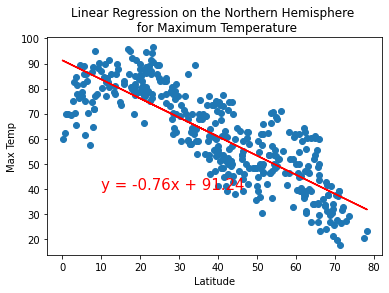

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

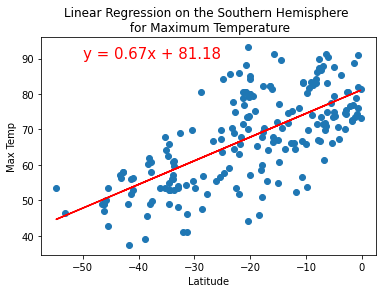

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

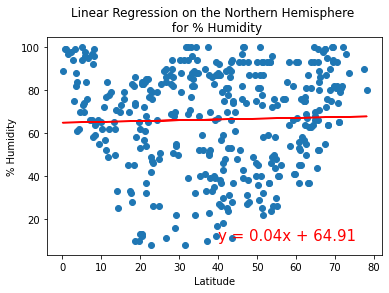

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

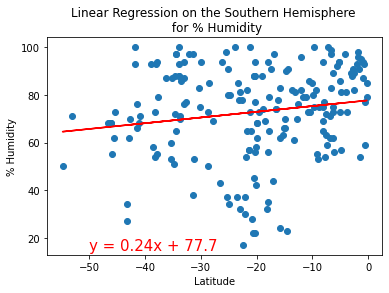

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

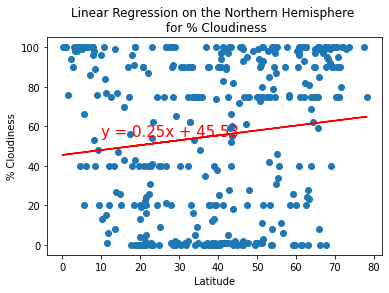

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,55))

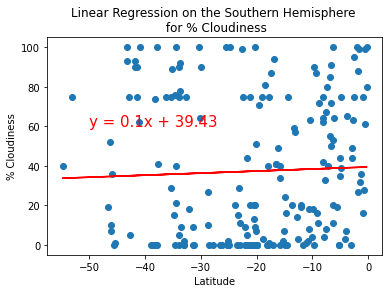

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

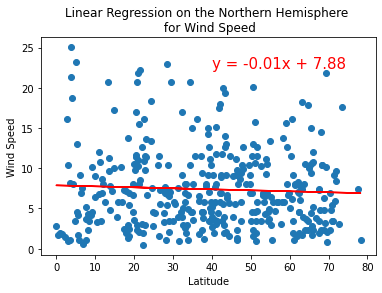

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,22.5))

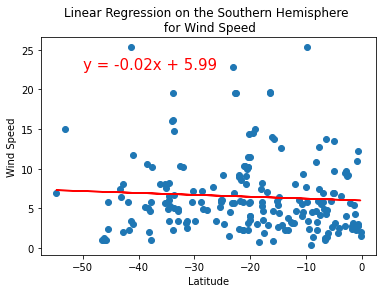

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22.5))